In [1]:
import pandas as pd

df = pd.read_csv('Sunspots.csv', sep=',')
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [2]:
df.shape

(3265, 3)

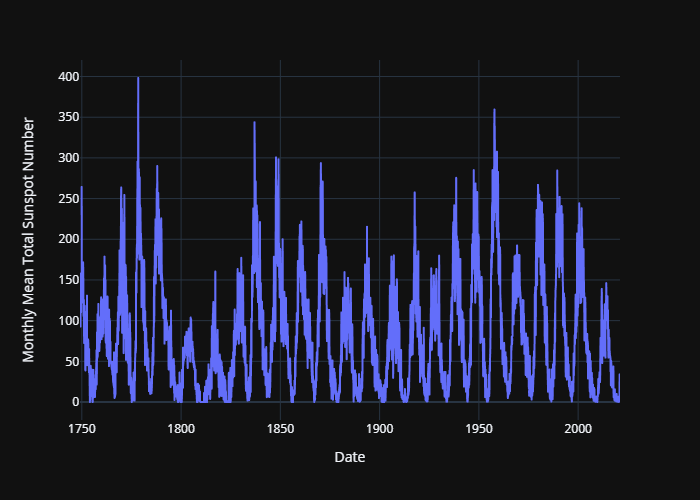

In [6]:
import plotly.express as px
fig = px.line(df, x='Date', y='Monthly Mean Total Sunspot Number')
fig.show('png')